In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
df = pd.read_csv(path)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
custom_map = {'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4}
df['Drug_num'] = df['Drug'].map(custom_map)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,25.355,drugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,drugY,4


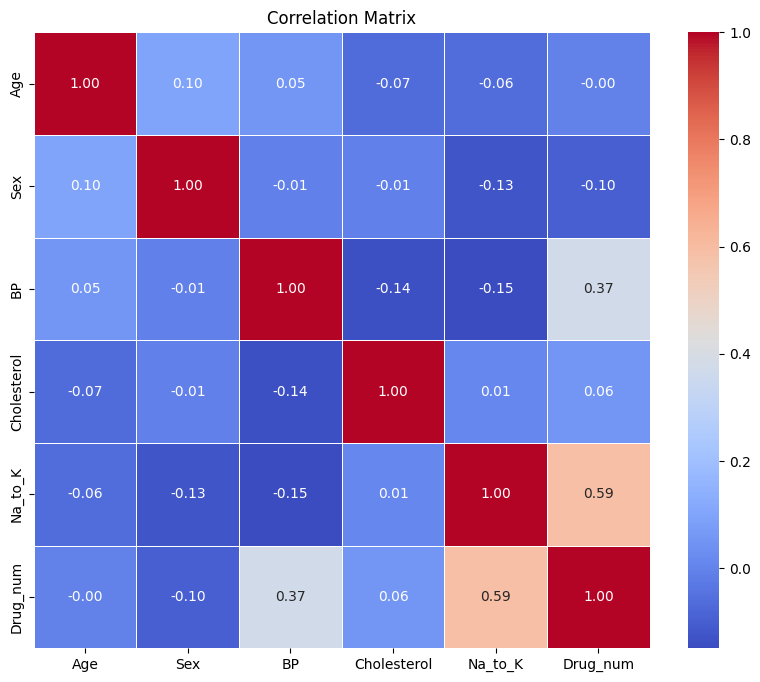

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

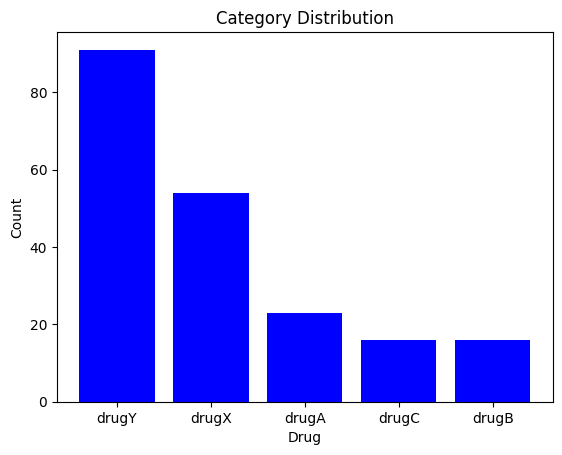

In [10]:
cat_counts = df['Drug'].value_counts()

plt.bar(cat_counts.index, cat_counts.values, color='blue')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.show()

In [11]:
X = df.drop(['Drug', 'Drug_num'], axis=1)
y = df['Drug']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugTree.fit(X_train, y_train)

tree_pred = drugTree.predict(X_test)
print("Decision Tree's Accuracy:", metrics.accuracy_score(y_test, tree_pred))

Decision Tree's Accuracy: 1.0


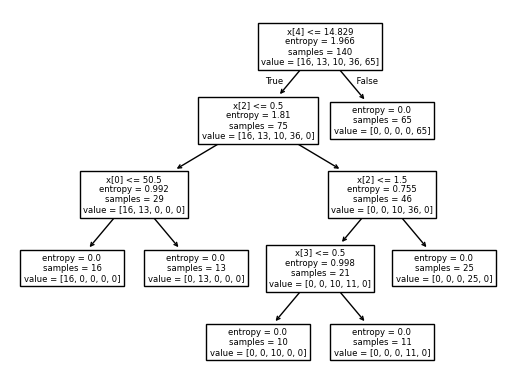

In [16]:
plot_tree(drugTree)
plt.show()

Drug A : Na\_to\_K <= 14.627, BP = High, Age <= 50.5<br>
Drug B : Na\_to\_K <= 14.627, BP = High, Age > 50.5<br>
Drug C : Na\_to\_K <= 14.627, BP = Low, Cholesterol <= High<br>
Drug X : Na\_to\_K <= 14.627, BP = Normal, Cholesterol = High

In [17]:
drugTree1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
drugTree1.fit(X_train, y_train)

tree_pred1 = drugTree1.predict(X_test)
print("Decision Tree's Accuracy:", metrics.accuracy_score(y_test, tree_pred1))

Decision Tree's Accuracy: 0.9
